[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 6.5146
R² Score: 0.9912

Sample Prediction Comparison:
            Actual Price  Predicted Price  Error  Percentage Error (%)
Date                                                                  
2023-01-12        133.04           131.62   1.41                  1.06
2023-01-13        134.20           132.93   1.27                  0.95
2023-01-17        133.48           134.08  -0.60                 -0.45
2023-01-18        133.54           133.41   0.13                  0.10
2023-01-19        136.11           133.49   2.61                  1.92
2023-01-20        139.31           136.02   3.29                  2.36
2023-01-23        140.71           139.15   1.55                  1.10
2023-01-24        140.05           140.55  -0.50                 -0.36
2023-01-25        142.12           139.94   2.18                  1.53
2023-01-26        144.06           141.98   2.08                  1.45


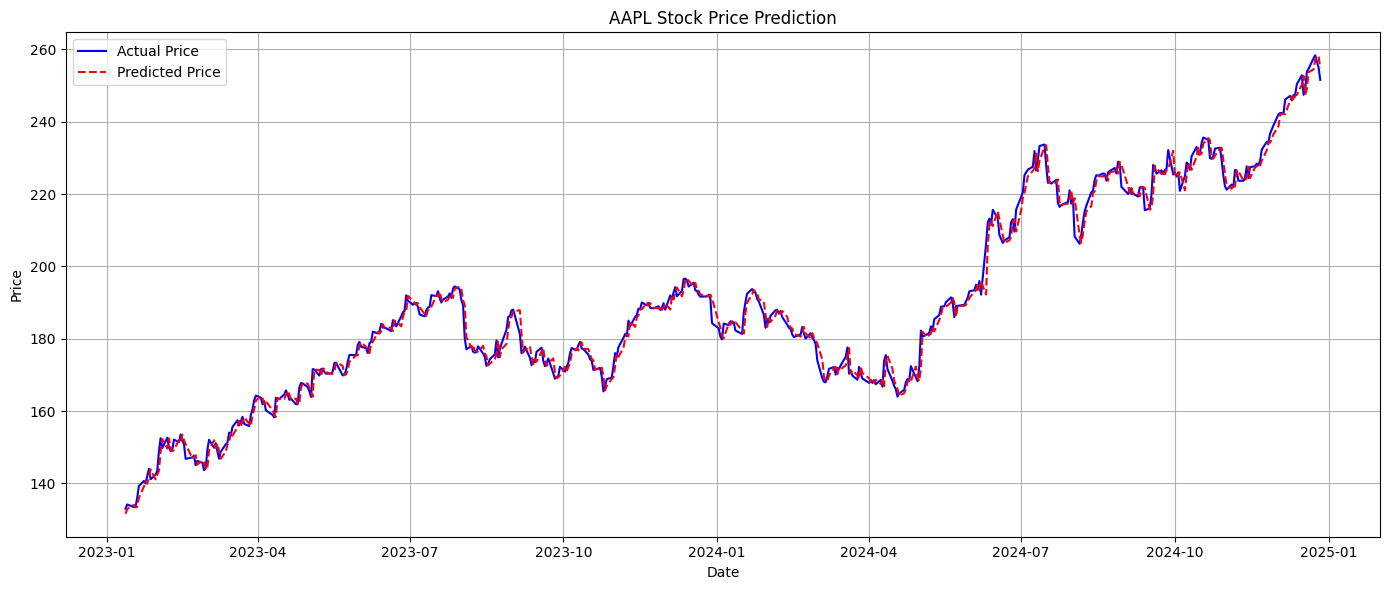

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load Historical Stock Data
ticker = 'AAPL'  # You can change to 'MSFT', 'GOOG', etc.
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')

# Step 2: Feature Engineering
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Target'] = data['Close'].shift(-1)  # Predict next day's close
data = data.dropna()

# Step 3: Prepare Data
features = ['Close', 'MA10', 'MA50']
X = data[features]
y = data['Target']

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train Model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Step 6: Evaluate Model
# Convert predictions to a Series with the same index as y_test
pred_series = pd.Series(predictions, index=y_test.index)

mse = mean_squared_error(y_test, pred_series)
r2 = r2_score(y_test, pred_series)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': pred_series,
    'Error': y_test - pred_series,
    'Percentage Error (%)': ((y_test - pred_series) / y_test) * 100
})

# Display sample predictions
print("\nSample Prediction Comparison:")
print(comparison_df.head(10).round(2))

# Step 7: Plot Results
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, pred_series, label='Predicted Price', color='red', linestyle='--')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

